In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from skimage.io import imread
import skimage
base_skin_dir = os.path.join('Data/')
plt.style.use('ggplot')

In [2]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [3]:
tile_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
# tile_df.sample(3)

In [5]:
tile_df.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0000835,ISIC_0032602,nv,histo,male,back,Data/HAM10000_images_part_2/ISIC_0030333.jpg,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


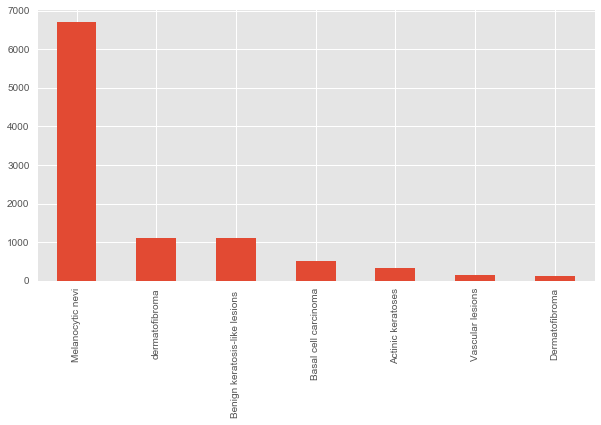

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

In [4]:
tile_df['image'] = tile_df['path'].map(imread)

In [5]:
tile_df['image'].map(lambda x: x.shape).value_counts()

(450, 600, 3)    10015
Name: image, dtype: int64

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
set([i for i in tile_df['cell_type_idx'].values])

In [6]:
from PIL import Image
def package_mnist_df(in_rows, 
                     image_col_name = 'image',
                     label_col_name = 'cell_type_idx',
                     image_shape=(28, 28), 
                     image_mode='RGB',
                     label_first=False
                    ):
    print in_rows
    out_vec_list = in_rows[image_col_name].map(lambda x: np.array(Image.fromarray(x).resize(image_shape, resample=Image.LANCZOS).convert(image_mode)).ravel())
    out_vec = np.stack(out_vec_list, 0)
    out_df = pd.DataFrame(out_vec)
    n_col_names =  ['pixel{:04d}'.format(i) for i in range(out_vec.shape[1])]
    out_df.columns = n_col_names
    out_df['label'] = in_rows[label_col_name].values.copy()
    if label_first:
        return out_df[['label']+n_col_names]
    else:
        return out_df

In [7]:
out_df = package_mnist_df(tile_df, 
                          image_shape=(64, 64),
                         image_mode="RGB")
out_path = 'hmnist_64_64_RGB.csv'
out_df.to_csv(out_path, index=False)
print "saved"
# print(f'Saved {out_df.shape} -> {out_path}: {os.stat(out_path).st_size/1024:2.1f}kb')

         lesion_id      image_id     dx dx_type   age     sex  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male   
5      HAM_0001466  ISIC_0027850    bkl   histo  75.0    male   
6      HAM_0002761  ISIC_0029176    bkl   histo  60.0    male   
7      HAM_0002761  ISIC_0029068    bkl   histo  60.0    male   
8      HAM_0005132  ISIC_0025837    bkl   histo  70.0  female   
9      HAM_0005132  ISIC_0025209    bkl   histo  70.0  female   
10     HAM_0001396  ISIC_0025276    bkl   histo  55.0  female   
11     HAM_0004234  ISIC_0029396    bkl   histo  85.0  female   
12     HAM_0004234  ISIC_0025984    bkl   histo  85.0  female   
13     HAM_0001949  ISIC_0025767    bkl   histo  70.0    male   
14     HAM_0001949  ISIC_

saved
